In [179]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import utils
from sklearn.model_selection import KFold
from numpy import random
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate


In [180]:
training_set = pd.read_csv("train.csv")
test_set = pd.read_csv('test.csv')

In [181]:
training_set.head(5)

,x0,x1,target
0,0.056909,0.515155,0
1,0.680780,0.993630,0
2,1.436635,0.674150,1
3,8.496151,0.893728,0
4,13.643436,0.591976,1


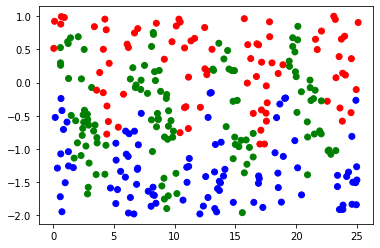

In [182]:
colors = ['red','green','blue']

plt.scatter(training_set['x0'], training_set['x1'], c=training_set['target'], cmap=matplotlib.colors.ListedColormap(colors))


In [183]:
X = training_set.iloc[:,0:2]
y= training_set.iloc[:,2]


In [184]:
std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

In [185]:
y.shape

(300,)

In [186]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_5 = poly_features.fit_transform(X)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_10 = poly_features.fit_transform(X)
poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_15 = poly_features.fit_transform(X)
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_20 = poly_features.fit_transform(X)
poly_features = PolynomialFeatures(degree=25, include_bias=False)
X_25 = poly_features.fit_transform(X)

In [187]:
def train_model(X_train,y_train,n_splits=5 , n_iter =10):
  LDA=LinearDiscriminantAnalysis(n_components=2)
  cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_iter, random_state=1)
  n_scores = cross_validate(LDA, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise',return_train_score=True)
  return n_scores['test_score'],n_scores['train_score'],np.mean(n_scores['test_score']),np.mean(n_scores['train_score']),LDA    

In [188]:
val_scores_5,train_scores_5,mean_val_scores_5,mean_train_scores_5,LDA5 = train_model(X_5,y)
val_scores_10,train_scores_10,mean_val_scores_10,mean_train_scores_10,LDA10 = train_model(X_10,y)
val_scores_15,train_scores_15,mean_val_scores_15,mean_train_scores_15,LDA15 = train_model(X_15,y)
val_scores_20,train_scores_20,mean_val_scores_20,mean_train_scores_20,LDA20 = train_model(X_20,y)
val_scores_25,train_scores_25,mean_val_scores_25,mean_train_scores_25,LDA25 = train_model(X_25,y)


In [189]:
mean_val_scores =[mean_val_scores_5,mean_val_scores_10,mean_val_scores_15,mean_val_scores_20,mean_val_scores_25]
mean_train_scores=[mean_train_scores_5,mean_train_scores_10,mean_train_scores_15,mean_train_scores_20,mean_train_scores_25]
train_scores = [train_scores_5,train_scores_10,train_scores_15,train_scores_20,train_scores_25]
val_scores = [val_scores_5,val_scores_10,val_scores_15,val_scores_20,val_scores_25]

In [190]:
for i in range(5):
  print('deegre = {}'.format((i+1)*5))
  print('train accuracy :{}         val accuracy : {}'.format(mean_train_scores[i],mean_val_scores[i]))

deegre = 5
train accuracy :0.6964166666666667         val accuracy : 0.6523333333333333
deegre = 10
train accuracy :0.8563333333333333         val accuracy : 0.7239999999999999
deegre = 15
train accuracy :0.9730833333333334         val accuracy : 0.7773333333333333
deegre = 20
train accuracy :0.9784999999999999         val accuracy : 0.7573333333333332
deegre = 25
train accuracy :0.9821666666666666         val accuracy : 0.7253333333333335


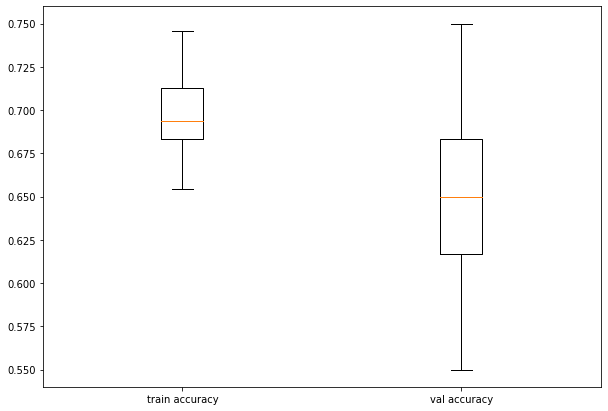

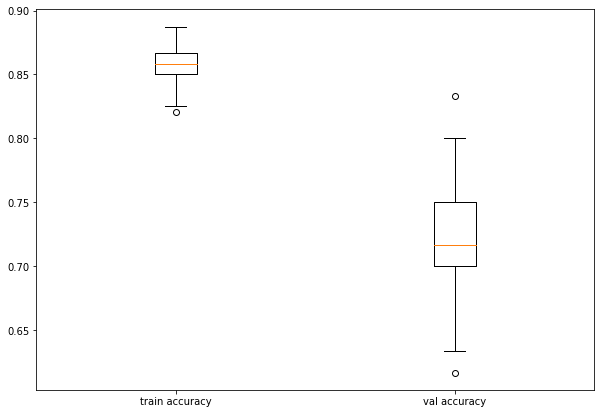

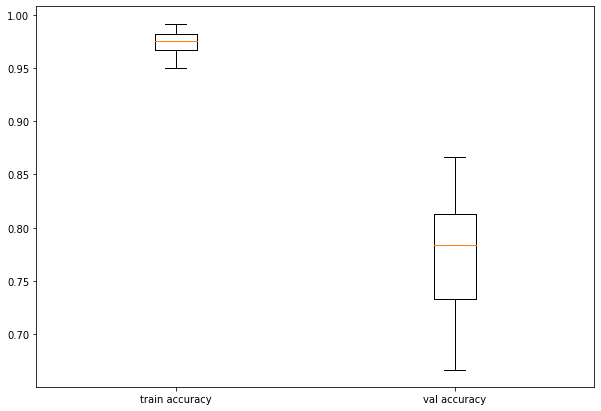

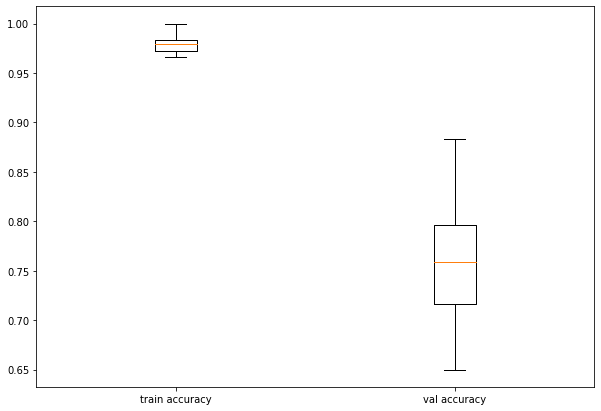

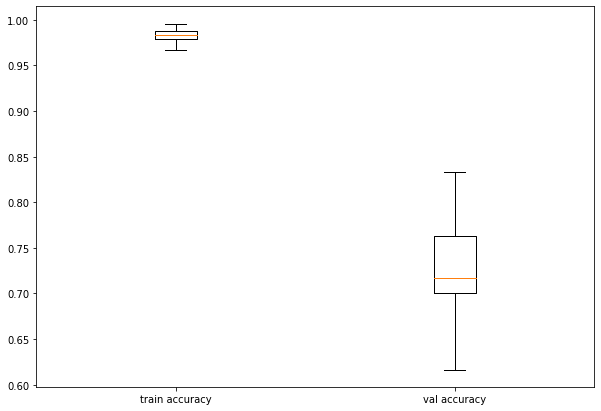

In [191]:
for i in range(5):
  fig = plt.figure(figsize =(10, 7))
  plt.boxplot(x=[train_scores[i],val_scores[i]],labels=("train accuracy","val accuracy",))

In [118]:
degrees = [x for x in range(5,25)]
n_splits = [x for x in range(3,10)]
n_iter = [x for x in range(5,15)]
print(degrees)
max_mean=0
max_min =0
mean_array=[0,0,0]
max_array=[0,0,0]
for s in n_splits:
  for n in n_iter:
    for deg in degrees:
      poly_features = PolynomialFeatures(degree=deg, include_bias=False)
      X_poly = poly_features.fit_transform(X)
      val_scores,train_score,mean_val_score,mean_train_score,LDA = train_model(X_poly,y,s,n)
      print("n_split : {} , n_iter : {} ,  degree {}".format(s,n,deg))
      print("val mean : {} , train mean {}".format(mean_val_score,mean_train_score))
      print("val max {} , train max {}".format(np.max(val_scores),np.max(train_score)))
      validation_max = np.max(val_scores)
      if mean_val_score > max_mean:
          mean_array[0]=s
          mean_array[1]=n
          mean_array[2]= deg
          max_mean = mean_val_score
      if validation_max> max_min:
          max_array[0]=s
          max_array[1]=n
          max_array[2]= deg  
          max_min=validation_max

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
n_split : 3 , n_iter : 5 ,  degree 5
val mean : 0.6523333333333333 , train mean 0.6964166666666667
val max 0.75 , train max 0.7458333333333333
n_split : 3 , n_iter : 5 ,  degree 6
val mean : 0.68 , train mean 0.7272499999999998
val max 0.85 , train max 0.775
n_split : 3 , n_iter : 5 ,  degree 7
val mean : 0.7023333333333334 , train mean 0.7535833333333332
val max 0.8 , train max 0.8041666666666667
n_split : 3 , n_iter : 5 ,  degree 8
val mean : 0.6936666666666668 , train mean 0.7706666666666666
val max 0.8 , train max 0.8125
n_split : 3 , n_iter : 5 ,  degree 9
val mean : 0.6913333333333332 , train mean 0.7974166666666666
val max 0.7833333333333333 , train max 0.825
n_split : 3 , n_iter : 5 ,  degree 10
val mean : 0.7239999999999999 , train mean 0.8563333333333333
val max 0.8333333333333334 , train max 0.8875
n_split : 3 , n_iter : 5 ,  degree 11
val mean : 0.7733333333333333 , train mean 0.9411666666666667
val

In [121]:
mean_array

[3, 5, 12]

In [122]:
max_array

[3, 5, 12]

In [192]:
X_test_std  = std_scale.transform(test_set)

In [193]:
poly_features = PolynomialFeatures(degree=12, include_bias=False)
X_poly_test = poly_features.fit_transform(X_test_std)

In [194]:
poly_features = PolynomialFeatures(degree=12, include_bias=False)
X_12 = poly_features.fit_transform(X)


In [195]:
LDA_best=LinearDiscriminantAnalysis(n_components=2)


In [196]:
scores=[]
train_score=[]
for i in range(5):

        kf = KFold(n_splits=3 , random_state=42,shuffle=True)
        for train_index, test_index in kf.split(X_12):
          X_train_folds = X_12[train_index]
          y_train_folds = y[train_index]
          X_test_fold = X_12[test_index]
          y_test_fold = y[test_index]
          
          LDA_best.fit(X_train_folds,y_train_folds)
          y_predictions = LDA_best.predict(X_test_fold)
          val_acc = accuracy_score(y_test_fold, y_predictions)
          y_train_predictions= LDA_best.predict(X_train_folds)
          train_acc= accuracy_score(y_train_folds, y_train_predictions)
          scores.append(val_acc)
          train_score.append(train_acc)
val_acc=np.mean(scores)
train_acc = np.mean(train_score)          

In [197]:
val_acc

0.7900000000000001

In [198]:
train_acc

0.98

In [199]:
y_test_prediction = LDA_best.predict(X_poly_test)

In [200]:
np.savetxt("prediction.csv", y_test_prediction, delimiter=",")